In [12]:
from os import listdir
import numpy as np
import matplotlib.pyplot as plt

In [4]:
phase_dir = '../phased_ihart'
chroms = [str(x) for x in range(1, 23)]
max_end_pos = None

In [6]:
is_ok = 0
for filename in listdir(phase_dir):
    if filename.endswith('.phased.txt'):
        has_chrom = np.zeros((len(chroms),), dtype=bool)
        end_pos = -np.ones((len(chroms),), dtype=int)
        with open('%s/%s' % (phase_dir, filename), 'r')  as f:
            try:
                next(f) # skip header
                for line in f:
                    pieces = line.strip().split('\t')
                    line_chrom = pieces[0][3:]
                    if line_chrom in chroms:
                        chrom_index = chroms.index(line_chrom)
                        has_chrom[chrom_index] = True
                        end_pos[chrom_index] = np.maximum(end_pos[chrom_index], int(pieces[-1]))
            except:
                print('Empty file', filename)
        
        if max_end_pos is None:
            max_end_pos = end_pos
            
        if np.any(~has_chrom):
            print('Missing chrom', filename)
        elif np.any(max_end_pos != end_pos):
            print('Chromosome ends early', filename, 
                  [chroms[i] for i in np.where(max_end_pos != end_pos)[0]])
        else:
            is_ok += 1
print('Families passed', is_ok)


Missing chrom AU0453.phased.txt
Missing chrom AU1921.phased.txt
Missing chrom AU1072.phased.txt
Empty file AU1397.phased.txt
Missing chrom AU1397.phased.txt
Empty file AU3779.phased.txt
Missing chrom AU3779.phased.txt
Missing chrom AU0897.phased.txt
Families passed 858


In [10]:
file_to_uncertain = dict()
for filename in listdir(phase_dir):
    if filename.endswith('.phased.txt'):
        states = []
        with open('%s/%s' % (phase_dir, filename), 'r')  as f:
            header = next(f).strip().split('\t')[1:-2] # skip header
            states = []
            chroms = []
            starts, ends = [], []
            for line in f:
                pieces = line.strip().split('\t')
                chroms.append(int(pieces[0][3:]))
                states.append(list(map(int, pieces[1:-2])))
                start, end = int(pieces[-2]), int(pieces[-1])
                starts.append(start)
                ends.append(end)
                assert len(states[-1]) == len(header)
        states = np.array(states).T
        chroms = np.array(chroms)
        starts = np.array(starts)
        ends = np.array(ends)
        mult = ends-starts
        file_to_uncertain[filename] = np.sum(mult[np.any(states==-1, axis=0)])/np.sum(mult)


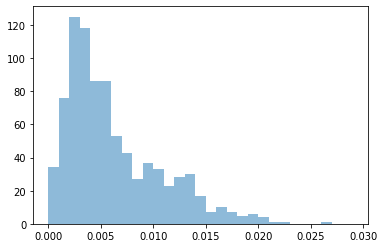

In [17]:
plt.hist(file_to_uncertain.values(), alpha=0.5, bins=np.arange(0, 0.03, 0.001))
plt.show()